### Data for RNN

When you input data to RNN it is in form of `(timesteps, input_features)`

Eg. movie was good -> Converting into vectors -> `[[10000], [01000], [00100]]` -> RNN will take input words one by one and for the first word the `t=1 (timestep = 1)` and for second t=2 and this will go on and this is represented as `(3, 5) -> (timesteps, input_features)`

In case of many sentences the input will be `(batch_size, timesteps, input_features)` -> batch_size will depend on how many sentences you want to input at once, timesteps -> will be the number of words in the largest sentence , input_features -> no of features in each sentence

If there are 4 sentences and largest sentence of 10 words then input size will be `(3, 10, 10)`

### Architecture of RNN (Recurrent Neural Network)

RNNs are preety similar to ANNs but there are 2 major differences :
1. The data input in RNNs are based on timesteps means you don't feed your entire sentence at once you will input your first word of sentence and then you will input it's timestep (t = 1) and you get an output (which will act as feedback for next word) and then you will input your second word and this time (t = 2) and you will get an output (which will act as feedback for next word) and this goes on...

2. ANN is a Feed Forward Neural network but RNN is not for a sentence in RNN your hidden state gives a feedback to the hidden layer based on previous input for the next word and this creates a big difference, means that each hidden layer will give feedback to itself and other neurons on the same hidden layer

For t = 1, you will input 0 or random numbers since here we don't have feedback and then at t = 2 feedback will start

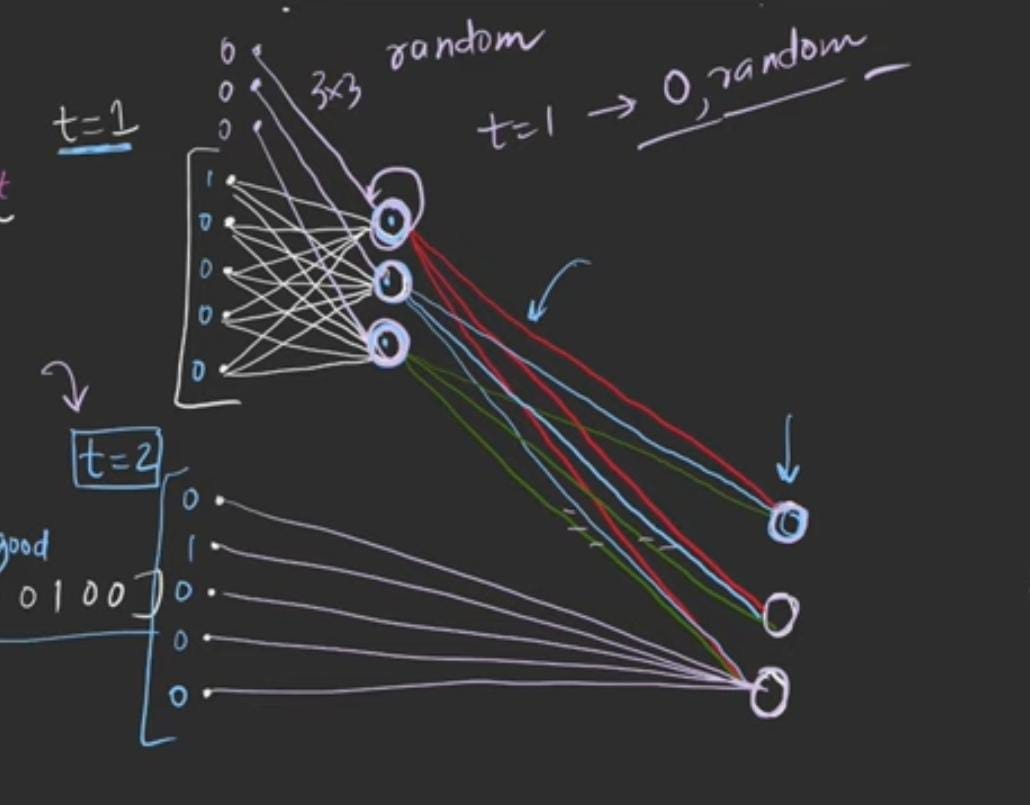

### Forward Propagation in RNN

At each time step 𝑡, the input 𝑥𝑡 is combined with the hidden state from the previous time step ℎ𝑡−1 using a weight matrix. This produces a new hidden state ℎ𝑡, which holds information about the current input and past context. The hidden state is then passed forward to influence the next time step, creating feedback within the network. Additionally, the hidden state is used to calculate the output 𝑦𝑡 for the current time step. This step-by-step process allows RNNs to capture dependencies in sequential data, where the order of information matters significantly.

For next word also for t=1, vector of 0 or random numbers act as feedback

When one word as one sentence is inputted but you are using the same layer to calculate the output this is why it is called recurrent.

You are giving new inputs but always the same weights are been used, means there is weight sharing

A simple RNN can store sequence data upto 10 time steps

In [1]:
from keras import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
# This is for sentiment analysis + or - (binary classification)
# Assuming there are only 3 sentences and 5 features and biggest sentence is of 4 words
model = Sequential()

model.add(SimpleRNN(3, input_shape=(4, 5)))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 3)                   │              27 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
print(model.get_weights()[0].shape)
model.get_weights()[0]

(5, 3)


array([[-0.26543796,  0.18126923,  0.0875634 ],
       [-0.63661754, -0.02307481,  0.47064   ],
       [-0.7327303 ,  0.23455733,  0.5856325 ],
       [-0.478988  ,  0.7991889 , -0.2921821 ],
       [ 0.6389573 , -0.14238685, -0.17265153]], dtype=float32)

In [3]:
print(model.get_weights()[1].shape)
model.get_weights()[1]

(3, 3)


array([[-0.5686778 ,  0.68697095,  0.45241186],
       [ 0.7139328 ,  0.68538797, -0.14332911],
       [-0.40854058,  0.24148361, -0.88021606]], dtype=float32)

In [5]:
print(model.get_weights()[2].shape)
model.get_weights()[2]

(3,)


array([0., 0., 0.], dtype=float32)

In [6]:
print(model.get_weights()[3].shape)
model.get_weights()[3]

(3, 1)


array([[ 0.9711741 ],
       [ 0.23046982],
       [-0.1063211 ]], dtype=float32)

In [7]:
print(model.get_weights()[4].shape)
model.get_weights()[4]

(1,)


array([0.], dtype=float32)